<a href="https://colab.research.google.com/github/SwamyBhagathEvuri/Fmml-assignments/blob/main/Module_01_Lab_01_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extracting features from data

FMML Module 1, Lab 1<br>



In [58]:
! pip install wikipedia

import wikipedia
import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
import unicodedata
import plotly.express as px
import pandas as pd

# Part 1: Features of text
How do we apply machine learning on text? We can't directly use the text as input to our algorithms. We need to convert them to features. In this notebook, we will explore a simple way of converting text to features.

Let us download a few documents off Wikipedia.

In [ ]:
topic1 = 'Giraffe'
topic2 = 'Elephant'

wikipedia.set_lang('en')

eng1 = wikipedia.page(topic1).content
eng2 = wikipedia.page(topic2).content

wikipedia.set_lang('fr')

fr1 = wikipedia.page(topic1).content
fr2 = wikipedia.page(topic2).content

This is what the text looks like:

In [ ]:
fr2

'Les éléphants sont des mammifères proboscidiens de la famille des Éléphantidés. Ils correspondent aujourd\'hui à trois espèces réparties en deux genres distincts. L\'éléphant de savane d\'Afrique et l\'éléphant de forêt d\'Afrique, autrefois regroupés sous la même espèce d\'« éléphant d\'Afrique », appartiennent au genre Loxodonta, tandis que l\'éléphant d\'Asie, anciennement appelé « éléphant indien », appartient au genre Elephas. Ils se différencient par certaines caractéristiques anatomiques, les éléphants d\'Asie étant en général plus petits avec des oreilles plus petites, ou encore une différence du bout de la trompe. Ces espèces survivantes font localement l\'objet de programmes ou de projets de réintroduction et de protection.\nLe mot français « éléphant » vient du mot latin elephantus qui tire son origine du grec ἐλέφας / eléphas, « ivoire » ou « éléphant ».\nL\'éléphant apparait dans de nombreuses cultures. Il est symbole de sagesse dans la culture asiatique, connu pour sa mé

We need to clean this up a bit. Let us remove all the special characters and keep only 26 letters and space. Note that this will remove accented characters in French also. We are also removing all the numbers and spaces. So this is not an ideal solution.

In [ ]:
def cleanup(text):
  text = text.lower()  # make it lowercase
  text = re.sub('[^a-z]+', '', text) # only keep characters
  return text

In [ ]:
eng1 = cleanup(eng1)
eng2 = cleanup(eng2)
fr1 = cleanup(fr1)
fr2 = cleanup(fr2)

In [ ]:
print(eng1)

thegiraffeisalargeafricanhoofedmammalbelongingtothegenusgiraffaitisthetallestlivingterrestrialanimalandthelargestruminantonearthtraditionallygiraffeswerethoughttobeonespeciesgiraffacamelopardaliswithninesubspeciesmostrecentlyresearchersproposeddividingthemintouptoeightextantspeciesduetonewresearchintotheirmitochondrialandnucleardnaaswellasmorphologicalmeasurementssevenotherextinctspeciesofgiraffaareknownfromthefossilrecordthegiraffeschiefdistinguishingcharacteristicsareitsextremelylongneckandlegsitshornlikeossiconesanditsspottedcoatpatternsitisclassifiedunderthefamilygiraffidaealongwithitsclosestextantrelativetheokapiitsscatteredrangeextendsfromchadinthenorthtosouthafricainthesouthandfromnigerinthewesttosomaliaintheeastgiraffesusuallyinhabitsavannahsandwoodlandstheirfoodsourceisleavesfruitsandflowersofwoodyplantsprimarilyacaciaspecieswhichtheybrowseatheightsmostotherherbivorescannotreachlionsleopardsspottedhyenasandafricanwilddogsmaypreyupongiraffesgiraffesliveinherdsofrelatedfemalesan

Now let us calculate the frequency of the character n-grams. N-grams are groups of characters of size n. A unigram is a single character and a bigram is a group of two characters and so on.

Let us count the frequency of each character in a text and plot it in a histogram.

In [ ]:
# convert a tuple of characters to a string
def tuple2string(tup):
  st = ''
  for ii in tup:
    st = st + ii
  return st

# convert a tuple of tuples to a list of strings
def key2string(keys):
  return [tuple2string(i) for i in keys]

# plot the histogram
def plothistogram(ngram):
  keys = key2string(ngram.keys())
  values = list(ngram.values())

  # sort the keys in alphabetic order
  combined = zip(keys, values)
  zipped_sorted = sorted(combined, key=lambda x: x[0])
  keys, values = map(list, zip(*zipped_sorted))
  plt.bar(keys, values)

Let us compare the histograms of English pages and French pages. Can you spot a difference?

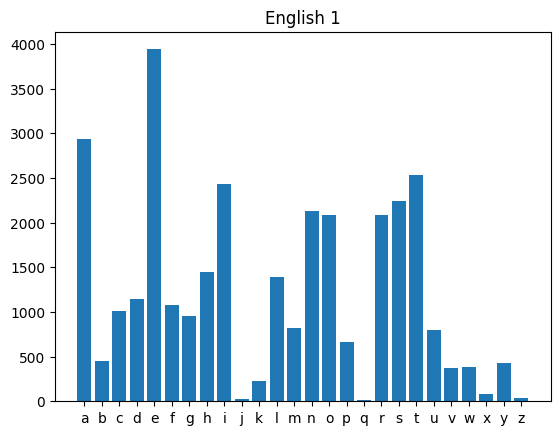

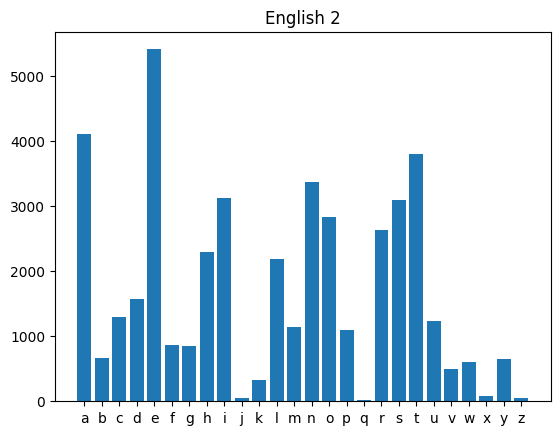

In [ ]:
unigram_eng1 = Counter(ngrams(eng1,1))
plothistogram(unigram_eng1)
plt.title('English 1')
plt.show()
unigram_eng2 = Counter(ngrams(eng2,1))
plothistogram(unigram_eng2)
plt.title('English 2')
plt.show()

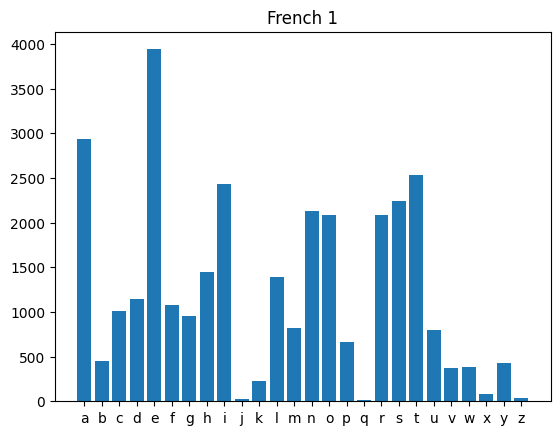

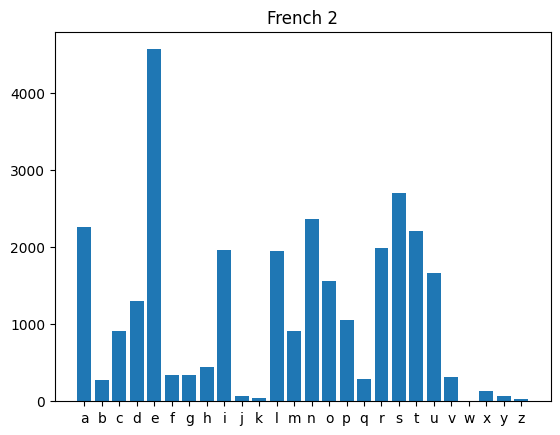

In [ ]:
unigram_fr1 = Counter(ngrams(fr1,1))
plothistogram(unigram_eng1)
plt.title('French 1')
plt.show()
unigram_fr2 = Counter(ngrams(fr2,1))
plothistogram(unigram_fr2)
plt.title('French 2')
plt.show()

We can see that the unigrams for French and English are very similar. So this is not a good feature if we want to distinguish between English and French. Let us look at bigrams.

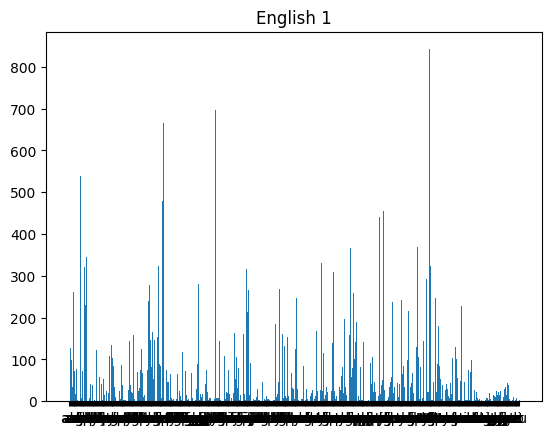

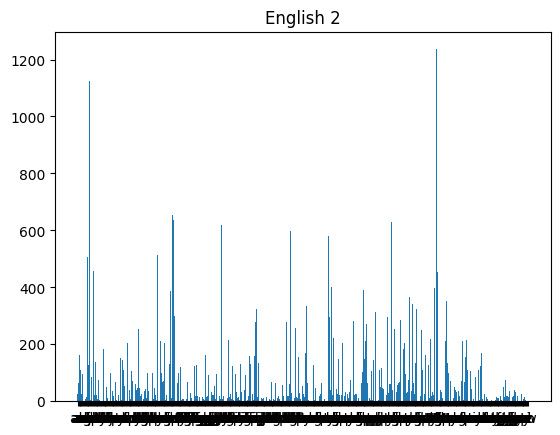

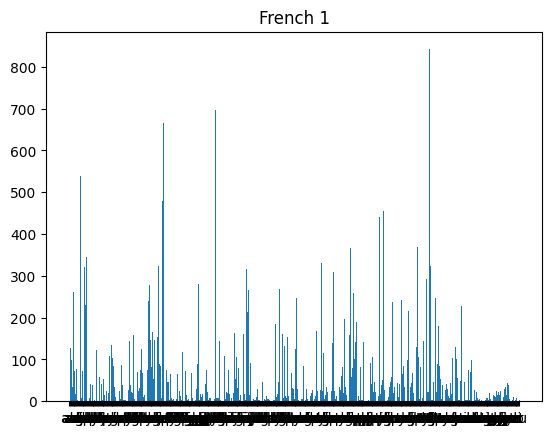

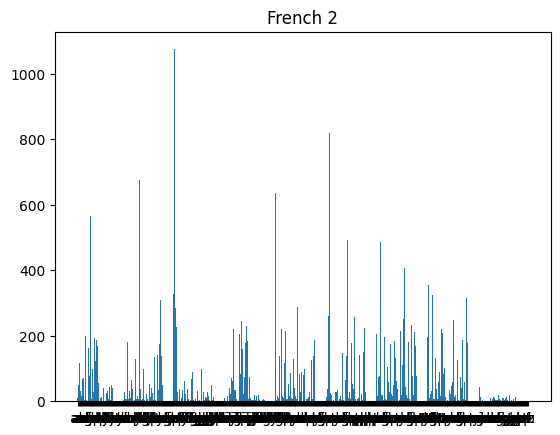

In [ ]:
bigram_eng1 = Counter(ngrams(eng1,2)) # bigrams
plothistogram(bigram_eng1)
plt.title('English 1')
plt.show()

bigram_eng2 = Counter(ngrams(eng2,2))
plothistogram(bigram_eng2)
plt.title('English 2')
plt.show()

bigram_fr1 = Counter(ngrams(fr1,2))
plothistogram(bigram_eng1)
plt.title('French 1')
plt.show()

bigram_fr2 = Counter(ngrams(fr2,2))
plothistogram(bigram_fr2)
plt.title('French 2')
plt.show()

Another way to visualize bigrams is to use a 2-dimensional graph.

In [ ]:
def plotbihistogram(ngram):
  freq = np.zeros((26,26))
  for ii in range(26):
    for jj in range(26):
      freq[ii,jj] = ngram[(chr(ord('a')+ii), chr(ord('a')+jj))]
  plt.imshow(freq, cmap = 'jet')
  return freq

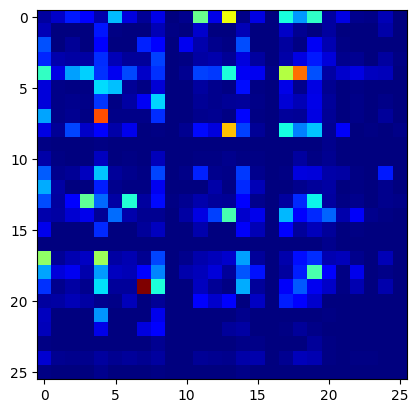

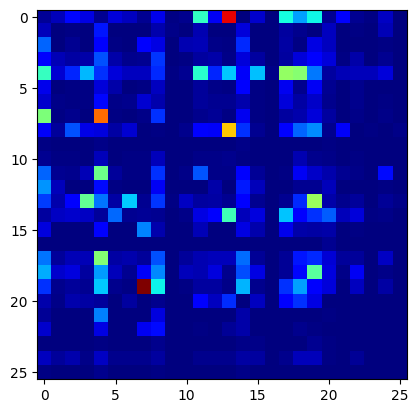

In [ ]:
bieng1 = plotbihistogram(bigram_eng1)
plt.show()
bieng2 = plotbihistogram(bigram_eng2)

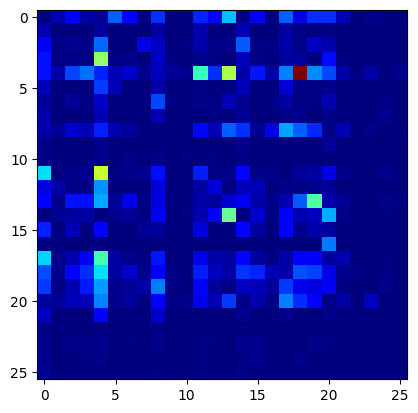

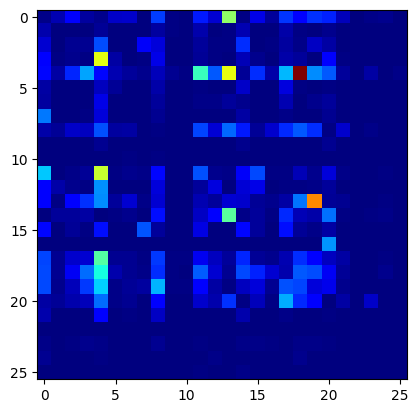

In [ ]:
bifr1 = plotbihistogram(bigram_fr1)
plt.show()
bifr2 = plotbihistogram(bigram_fr2)

Let us look at the top 10 ngrams for each text.

In [ ]:
from IPython.core.debugger import set_trace

def ind2tup(ind):
  ind = int(ind)
  i = int(ind/26)
  j = int(ind%26)
  return (chr(ord('a')+i), chr(ord('a')+j))

def ShowTopN(bifreq, n=10):
  f = bifreq.flatten()
  arg = np.argsort(-f)
  for ii in range(n):
    print(f'{ind2tup(arg[ii])} : {f[arg[ii]]}')

In [ ]:
print('\nEnglish 1:')
ShowTopN(bieng1)
print('\nEnglish 2:')
ShowTopN(bieng2)
print('\nFrench 1:')
ShowTopN(bifr1)
print('\nFrench 2:')
ShowTopN(bifr2)


English 1:
('t', 'h') : 842.0
('h', 'e') : 697.0
('e', 's') : 665.0
('i', 'n') : 594.0
('a', 'n') : 538.0
('e', 'r') : 478.0
('r', 'e') : 454.0
('r', 'a') : 441.0
('a', 'l') : 404.0
('n', 'd') : 393.0

English 2:
('t', 'h') : 1236.0
('a', 'n') : 1123.0
('h', 'e') : 981.0
('i', 'n') : 863.0
('n', 't') : 664.0
('e', 'r') : 653.0
('e', 's') : 637.0
('r', 'e') : 629.0
('h', 'a') : 618.0
('l', 'e') : 597.0

French 1:
('e', 's') : 737.0
('l', 'e') : 438.0
('e', 'n') : 409.0
('d', 'e') : 390.0
('o', 'n') : 349.0
('n', 't') : 329.0
('r', 'e') : 317.0
('e', 'l') : 308.0
('l', 'a') : 254.0
('s', 'e') : 254.0

French 2:
('e', 's') : 1075.0
('n', 't') : 820.0
('e', 'n') : 678.0
('d', 'e') : 675.0
('l', 'e') : 635.0
('a', 'n') : 566.0
('o', 'n') : 492.0
('r', 'e') : 486.0
('e', 'l') : 451.0
('s', 'e') : 407.0


We observe that the bigrams are similar across different topics but different across languages. Thus, the bigram frequency is a good feature for distinguishing languages, but not for distinguishing topics.

Thus, we were able to convert a many-dimensional input (the text) to 26 dimesions (unigrams) or 26*26 dimensions (bigrams).


A few ways to explore:
1. Try with different languages.
2. The topics we used are quite similar, wikipedia articles of 'elephant' and 'giraffe'. What happens if we use very different topics? What if we use text from another source than Wikipedia?
3. How can we use and visualize trigrams and higher n-grams?

USED DIFFERENT LANGUAGES AND DIFFERENT TOPICS

In [ ]:
## set language and then download the data.
topic1 = 'rabbit'  #used different topics.
topic2 = 'kangaroo'#2.if we used different topics also it will search in wikipedia and then gives output.
wikipedia.set_lang('hi') #1.used different languages are hindi and arabic
hi1 = wikipedia.page(topic1).content
hi2 = wikipedia.page(topic2).content
wikipedia.set_lang('ar')
ar1 = wikipedia.page(topic1).content
ar2 = wikipedia.page(topic2).content

printing in different languages from wikipedia module

In [ ]:
ar1

'الأرنب الأوروبي (الاسم العلمي: Oryctolagus cuniculus) هو نوع من الأرانب صغير الحجم، رمادي اللون مائل إلى البني، يتراوح حجمه بين 34-45 سم في الطول، وحوالي 1.3-2.2 كجم في الوزن. له آذان طويلة، كبير اليد والساقين، له أسنان حادة، والارانب الأوروبية لها حشوة على ليد وعلى القدمين للمساعدتها على لتخفيف صدمة التنقل السريع أثناء الركض. تتواجد هذه الأنواع في معظم أوروبا وأستراليا وهي عدة أنواع. يعتقد معظم العلماء أن العصر الروماني شهد بداية اتخاذ الأرنب الأوروبي حيوانا منزليا أليفا.\nيشتهر الأرنب الأوروبي بحفر شبكات الجحور، حيث يقضي معظم وقته في ذلك في غير أوقات الغداء. على عكس الأرانب المشابهة كالأرنب البرية (Lepus spp)، فإن الأرانب الأوروبية تولد بشكل مبكر، حيث يولد الصغار عميان وبدون فرو، في عش مبطن بالفراء في الجحور، وهي تعتمد كليًا على أمهاتها. تم إجراء الكثير من الأبحاث الحديثة حول سلوك الأرانب البرية في الستينيات من قبل مركزين للأبحاث. أحدهم كان لعالم الطبيعة رونالد لوكلي، الذي احتفظ بعدد من العبوات لمستعمرات الأرانب البرية، مع مرافق المراقبة، في أوريلتون، بيمبروكشاير. بغض النظر عن نشر ع

In [ ]:
hi2

'वृक्ष-कंगारू (tree-kangaroo) डेन्ड्रोलागस जीववैज्ञानिक वंश के धानीप्राणी (मारसूपियल) होते हैं। इनके शरीर वृक्ष विचरण के लिए अनुकूलित होते हैं और यह नया गिनी द्वीप के उष्णकटिबंधीय वर्षावनों, ऑस्ट्रेलिया के सुदूर पूर्वोत्तर के क्वीन्सलैंड राज्य के वर्षवनों और कुछ निकटवर्ती द्वीपों में मिलते हैं। इन स्थानों पर वनों को संकट होने से लगभग सभी वृक्ष-कंगारू जातियाँ संकटग्रस्त हो गई हैं। मैक्रोपोडों में यह एकमात्र वास्तविक वृक्ष विचरणिय वंश है।\n\n\n== इन्हें भी देखें ==\nमैक्रोपोडीडाए\nधानीप्राणी\nकंगारू\n\n\n== सन्दर्भ =='

TEXT FROM ANOTHER SOURCE THAN wikipedia



1***.What if we use text from another source than Wikipedia?***


**answer**:- Wikipedia is a Python library that makes it easy to access and parse data from Wikipedia. Search Wikipedia, get article summaries, get data like links and images from a page, and more. Wikipedia wraps the MediaWiki API so you can focus on using Wikipedia data, not getting it.
--BUT IF I USED ANOTHER SOURCES WHICH ARE ALTERNATIVE TO WIKIPEDIA LIKE "REQUESTS MODULE" . If i used this module , this is also can give text from internet but here it will give text with html code also, and also here one more disadvantage is here we cant do search for required item or topic,its not have access to user,first here we should mention the that webpage URL then only we will text from that web page and it will excute and printed.
 so, wikipedia is like a container its have all details about any topics it acts like a database. so,other than wikipedia is difficult or imposiible to search our required topic or item.   but web scrapping is posible in both WIKIPEDIA and REQUESTS module.

In [ ]:
!pip install requests
import requests

**SEE THIS EXAMPLE HOW REQUESTS MODULE WORKS**

In [ ]:
x = requests.get('https://en.wikipedia.org/wiki/Rabbit')
print(x.text)

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled vector-feature-custom-font-size-clientpref-disabled" lang="en" dir="ltr">
<head>
<meta charset="UTF-8">
<title>Rabbit - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled vector-feature-custom-font-s

***How can we use and visualize trigrams and higher n-grams?***



* Trigrams are a special case of the n-gram, where n is 3. They are often used in natural language processing for performing statistical analysis of texts and in cryptography for control and use of ciphers and codes.

**Trigrams or 3-grams **
In case of 3-grams, we pass the value of n=3 in ngrams function of NLTK. But first, we split the sentence into tokens and then pass these tokens to ngrams function.

As we can see we have got three words in each tuple for the Trigram model.

In [ ]:
from nltk.util import ngrams

n = 3
sentence = 'Whoever is happy will make others happy too'
unigrams = ngrams(sentence.split(), n)

for item in unigrams:
    print(item)

('Whoever', 'is', 'happy')
('is', 'happy', 'will')
('happy', 'will', 'make')
('will', 'make', 'others')
('make', 'others', 'happy')
('others', 'happy', 'too')


***Higher n-gram language models***
:Training the model
..For a given n-gram model:


1.  The probability of each word depends on the n-1 words before it. For a trigram model (n = 3), for example, each word’s probability depends on the 2 words immediately before it.

2.   
This probability is estimated as the fraction of times this n-gram appears among all the previous (n-1)-grams in the training set. In other words, training the n-gram model is nothing but calculating these conditional probabilities from the training text.



1. For each sentence, we count all n-grams from that sentence, not just unigrams. Thankfully, the nltk.util.ngrams function can generates n-grams of any length from a list of sentence tokens:

In [ ]:
from nltk.util import ngrams
list(ngrams(['i', 'have', 'a', 'dream', '[END]'], 2))

[('i', 'have'), ('have', 'a'), ('a', 'dream'), ('dream', '[END]')]


2.For each generated n-gram, we increment its count in the counts attribute of the class, which is a dict that maps each n-gram to their overall count in the training text. In additional, if that n-gram is at the start of the sentence — such as the bigram ‘i have’ — we also need to increment its sentence-starting count in additional to its overall count. This type of count will be stored in the start_counts attribute of the class.

## Features of Images.
### Images in digital format are stored as numeric values, and hence we can use these values as features. for ex : a black and white (binary) image is stored as an array of 0  and 255 or 0 and 1.

# Part 2: Written numbers

We will use a subset of the MNIST dataset. Each input character is represented in a 28*28 array. Let us see if we can extract some simple features from these images which can help us distinguish between the digits.

Load the dataset:

In [ ]:
from keras.datasets import mnist

#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Extract a subset of the data for our experiment:

In [ ]:
no1 = train_X[train_y==1,:,:]
no0 = train_X[train_y==0,:,:]

Let us visualize a few images here:

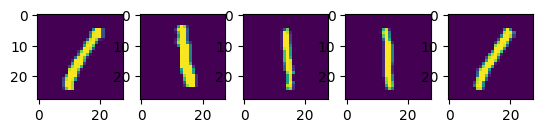

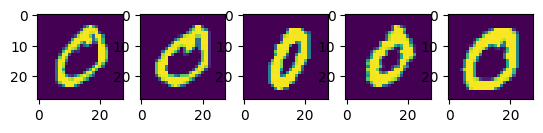

In [ ]:
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no1[ii,:,:])
plt.show()
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no0[ii,:,:])
plt.show()

suNow, let us start with a simple feature: the sum of all pixels and see how good this feature is.

In [ ]:
sum1 = np.sum(no1>0, (1,2)) # threshold before adding up
sum0 = np.sum(no0>0, (1,2))

Let us visualize how good this feature is: (X-axis is mean, y-axis is the digit)

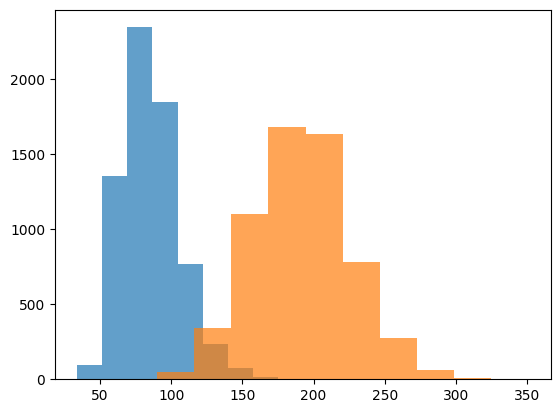

In [ ]:
plt.hist(sum1, alpha=0.7);
plt.hist(sum0, alpha=0.7);

We can already see that this feature separates the two classes quite well.

Let us look at another, more complicated feature. We will count the number black pixels that are surrounded on four sides by non-black pixels, or "hole pixels".

In [ ]:
def cumArray(img):
  img2 = img.copy()
  for ii in range(1, img2.shape[1]):
    img2[ii,:] = img2[ii,:] + img2[ii-1,:]  # for every row, add up all the rows above it.
  img2 = img2>0
  return img2

def getHolePixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  hole = hull & ~ (img>0) # remove the original digit to leave behind the holes
  return hole

Visualize a few:

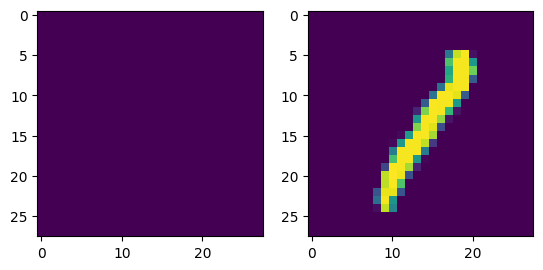

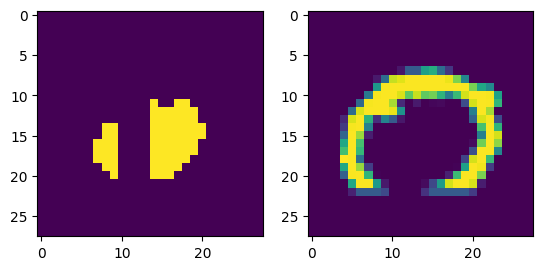

In [ ]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHolePixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Now let us plot the number of hole pixels and see how this feature behaves

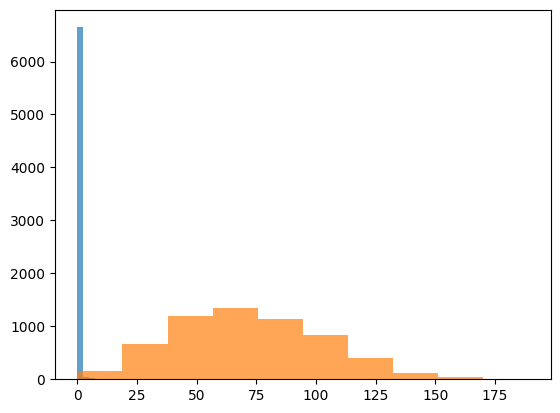

In [ ]:
hole1 = np.array([getHolePixels(i).sum() for i in no1])
hole0 = np.array([getHolePixels(i).sum() for i in no0])

plt.hist(hole1, alpha=0.7);
plt.hist(hole0, alpha=0.7);

This feature works even better to distinguish between one and zero.


Now let us try the number of pixels in the 'hull' or the number with the holes filled in:

In [ ]:
def getHullPixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  return hull

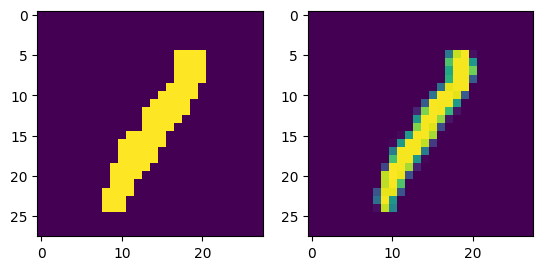

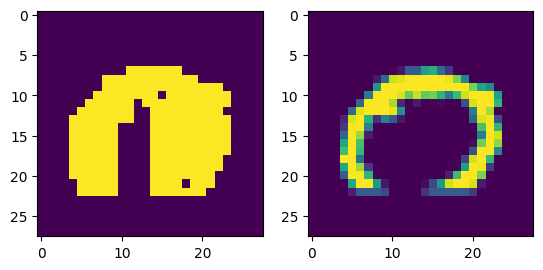

In [ ]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHullPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Plotting the number of hull pixels versus the digit:

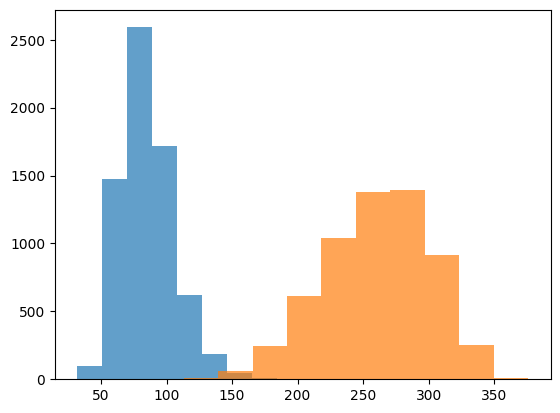

In [ ]:
hull1 = np.array([getHullPixels(i).sum() for i in no1])
hull0 = np.array([getHullPixels(i).sum() for i in no0])

plt.hist(hull1, alpha=0.7);
plt.hist(hull0, alpha=0.7);

Let us try one more feature, where we look at the number of boundary pixels in each image.

In [ ]:
def minus(a, b):
  return a & ~ b

def getBoundaryPixels(img):
  img = img.copy()>0  # binarize the image
  rshift = np.roll(img, 1, 1)
  lshift = np.roll(img, -1 ,1)
  ushift = np.roll(img, -1, 0)
  dshift = np.roll(img, 1, 0)
  boundary = minus(img, rshift) | minus(img, lshift) | minus(img, ushift) | minus(img, dshift)
  return boundary

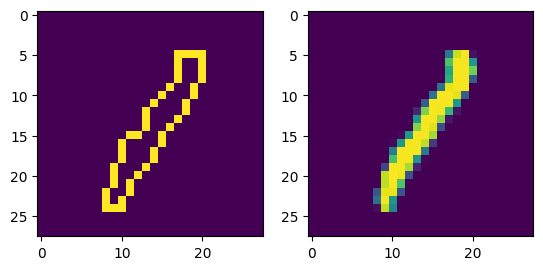

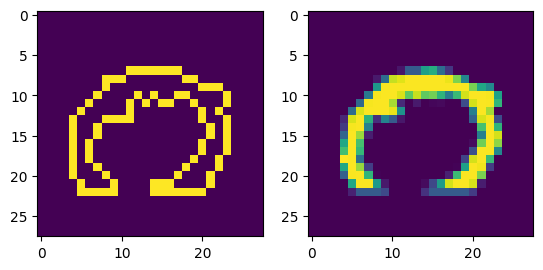

In [ ]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getBoundaryPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

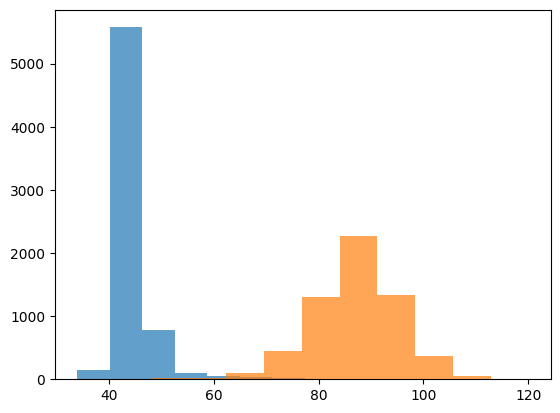

In [ ]:
bound1 = np.array([getBoundaryPixels(i).sum() for i in no1])
bound0= np.array([getBoundaryPixels(i).sum() for i in no0])

plt.hist(bound1, alpha=0.7);
plt.hist(bound0, alpha=0.7);

What will happen if we plot two features together?

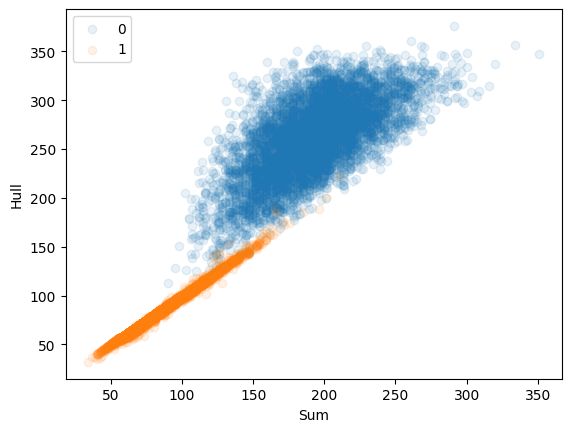

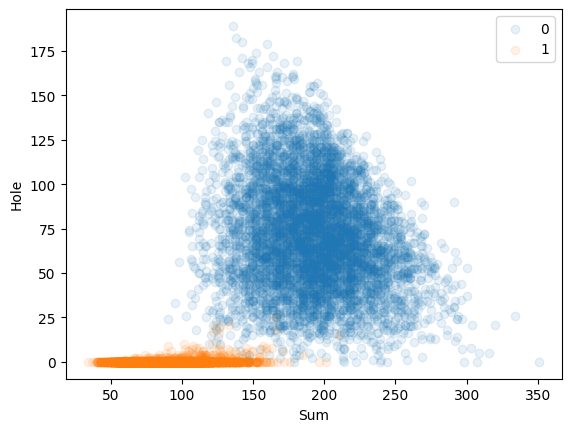

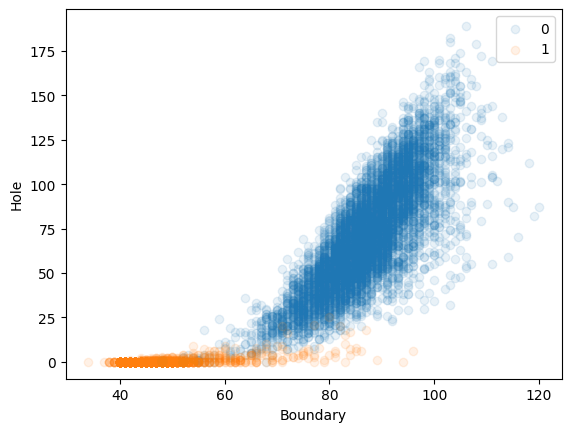

In [ ]:
# Sum and hull
plt.scatter(sum0, hull0, alpha=0.1)
plt.scatter(sum1, hull1, alpha=0.1)
plt.xlabel('Sum')
plt.ylabel('Hull')
plt.legend(['0','1'])
plt.show()

# Sum and hole
plt.scatter(sum0, hole0, alpha=0.1)
plt.scatter(sum1, hole1, alpha=0.1)
plt.xlabel('Sum');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

# Hole and boundary
plt.scatter(bound0, hole0, alpha=0.1)
plt.scatter(bound1, hole1, alpha=0.1)
plt.xlabel('Boundary');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

Now let us try plotting 3 features together.

In [ ]:
cl1 = ['class 1']*len(sum1)
cl0 = ['class 0']*len(sum0)
df = pd.DataFrame(list(zip(np.concatenate((hole0, hole0)), np.concatenate((sum1,sum0)),
                           np.concatenate((bound1,bound0)), np.concatenate((cl1, cl0)))),
               columns =['Hole', 'Sum', 'Boundary', 'Class'])
df.head()
fig = px.scatter_3d(df, x='Hole', y='Sum', z='Boundary', color='Class', opacity=0.1)
fig.show()

Feel free to explore the above graph with your mouse.


We have seen that we extracted four features from a 28*28 dimensional image.


Some questions to explore:
1. Which is the best combination of features?
2. How would you test or visualize four or more features?
3. Can you come up with your own features?
4. Will these features work for different classes other than 0 and 1?
5. What will happen if we take more that two classes at a time?

# ***1.Which is the best combination of features?***

in my view ,combination of  sum of pixels feature and number of hole pixels feature is the best combination because overlapping is low among other features

see here all these combinations

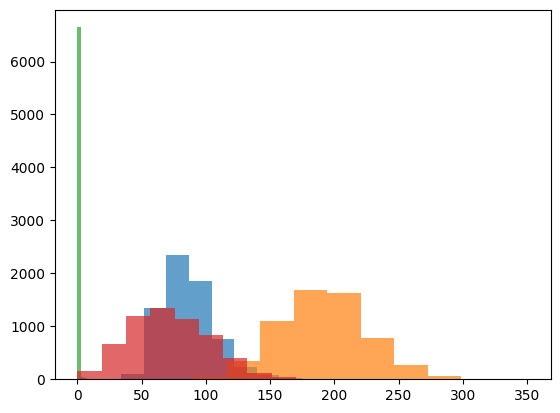

In [ ]:
plt.hist(sum1, alpha=0.7);
plt.hist(sum0, alpha=0.7);
hole1 = np.array([getHolePixels(i).sum() for i in no1])
hole0 = np.array([getHolePixels(i).sum() for i in no0])

plt.hist(hole1, alpha=0.7);
plt.hist(hole0, alpha=0.7);

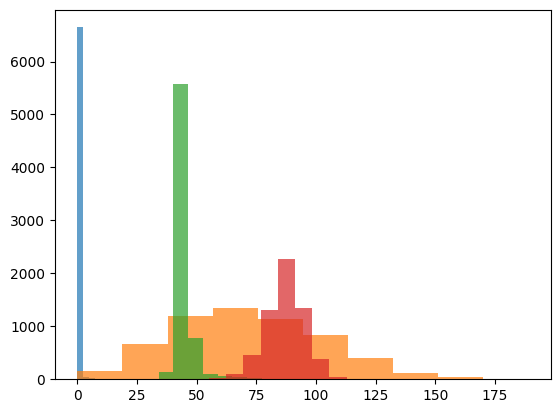

In [ ]:
hole1 = np.array([getHolePixels(i).sum() for i in no1])
hole0 = np.array([getHolePixels(i).sum() for i in no0])

plt.hist(hole1, alpha=0.7);
plt.hist(hole0, alpha=0.7);
bound1 = np.array([getBoundaryPixels(i).sum() for i in no1])
bound0= np.array([getBoundaryPixels(i).sum() for i in no0])

plt.hist(bound1, alpha=0.7);
plt.hist(bound0, alpha=0.7);

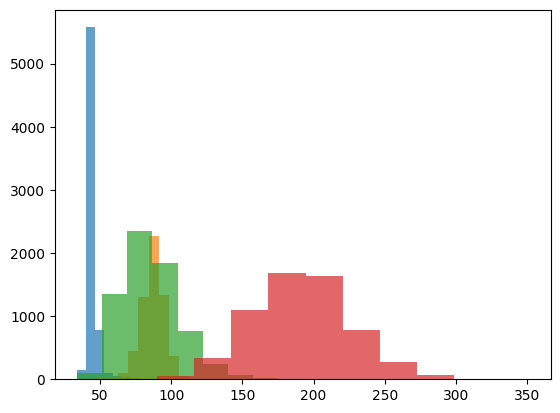

In [ ]:
bound1 = np.array([getBoundaryPixels(i).sum() for i in no1])
bound0= np.array([getBoundaryPixels(i).sum() for i in no0])

plt.hist(bound1, alpha=0.7);
plt.hist(bound0, alpha=0.7);
plt.hist(sum1, alpha=0.7);
plt.hist(sum0, alpha=0.7);
hole1 = np.array([getHolePixels(i).sum() for i in no1])
hole0 = np.array([getHolePixels(i).sum() for i in no0])

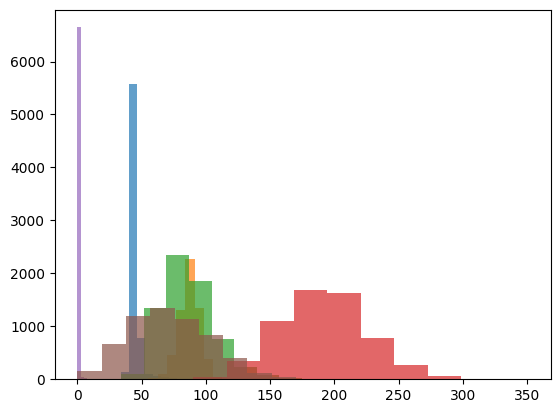

In [ ]:
bound1 = np.array([getBoundaryPixels(i).sum() for i in no1])
bound0= np.array([getBoundaryPixels(i).sum() for i in no0])

plt.hist(bound1, alpha=0.7);
plt.hist(bound0, alpha=0.7);
plt.hist(sum1, alpha=0.7);
plt.hist(sum0, alpha=0.7);
hole1 = np.array([getHolePixels(i).sum() for i in no1])
hole0 = np.array([getHolePixels(i).sum() for i in no0])
hole1 = np.array([getHolePixels(i).sum() for i in no1])
hole0 = np.array([getHolePixels(i).sum() for i in no0])

plt.hist(hole1, alpha=0.7);
plt.hist(hole0, alpha=0.7);

# 2.***How would you test or visualize four or more features?***



1.   first we have to load the dataset
2.   extract a subset of the data for our experiment
3.   and we have visualize some of the images,for that here we getting images by using plt.subplot(),plt.imshow() and plt.show()
4.   and we are plotting histograms by using plt.hist()
5. so, this is the process we are following to test or visualize four or any more features.

# **3.Can you come up with your own features?**

# im coming with

# ***EXTRACTING EDGE FEATURE***

In [ ]:
from google.colab import files
from IPython.display import Image

In [ ]:
import cv2
import pandas as pd
import numpy as np       #importing libraries
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread, imshow

In [ ]:
uploaded = files.upload()

Saving naturecf.jfif.jpg to naturecf.jfif.jpg


In [ ]:
import numpy as np
import cv2
img=cv2.imread("/content/naturecf.jfif.jpg")

((183, 275), <matplotlib.image.AxesImage at 0x7a875e7a58a0>)

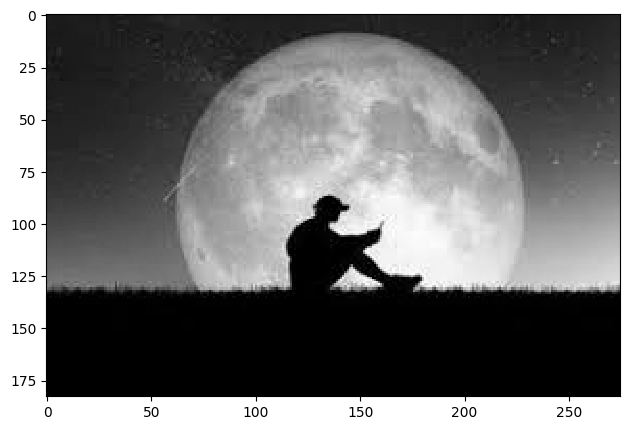

In [ ]:
image = imread('naturecf.jfif.jpg', as_gray=True)
image.shape, imshow(image)

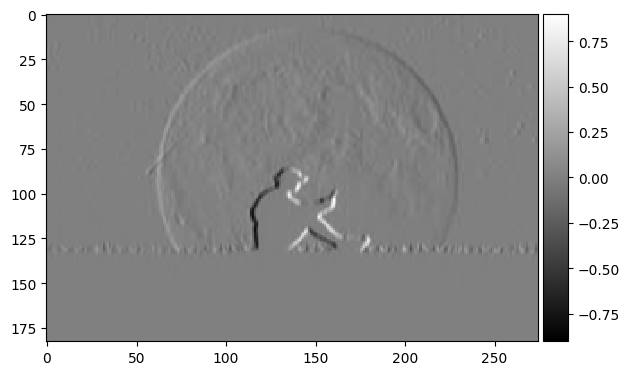

In [ ]:
import numpy as np
from skimage.io import imread, imshow
from skimage.filters import prewitt_h,prewitt_v
import matplotlib.pyplot as plt
%matplotlib inline

#reading the image
image = imread('naturecf.jfif.jpg',as_gray=True)

#calculating horizontal edges using prewitt kernel
edges_prewitt_horizontal = prewitt_h(image)
#calculating vertical edges using prewitt kernel
edges_prewitt_vertical = prewitt_v(image)

imshow(edges_prewitt_vertical, cmap='gray')

#4. **Will these features work for different classes other than 0 and 1?**

yes! these features work for different classes other than o and 1.  we can plot the classes from 0 to 9. but more than 9 we can't did.

# 5.***What will happen if we take more than two classes at a time?***

# **answer:-**this increases complexity of code and execution time and the plotting graphs are not good because overlapping was increased.
see below code for example:-

In [ ]:
no1 = train_X[train_y==3,:,:] ## dataset corresponding to number = 1.
no0 = train_X[train_y==9,:,:]
no2 = train_X[train_y==5,:,:]
no3 = train_X[train_y==7,:,:]  ## da

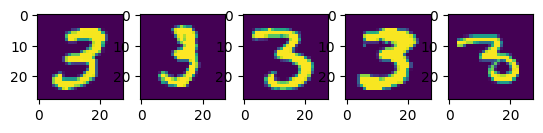

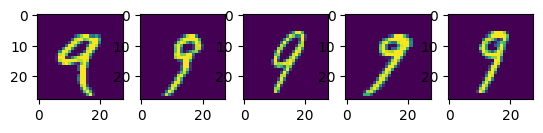

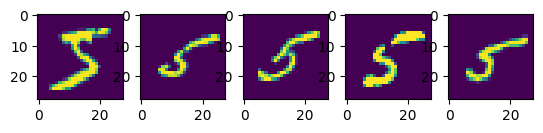

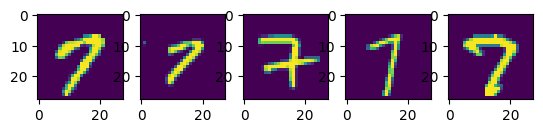

In [ ]:
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no1[ii,:,:])
plt.show()
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no0[ii,:,:])
plt.show()
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no2[ii,:,:])
plt.show()
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no3[ii,:,:])
plt.show()

In [ ]:
## sum of pixel values.

sum1 = np.sum(no1>0, (1,2)) # threshold before adding up
sum0 = np.sum(no0>0, (1,2))
sum2 = np.sum(no2>0, (1,2)) # threshold before adding up
sum3 = np.sum(no3>0, (1,2))

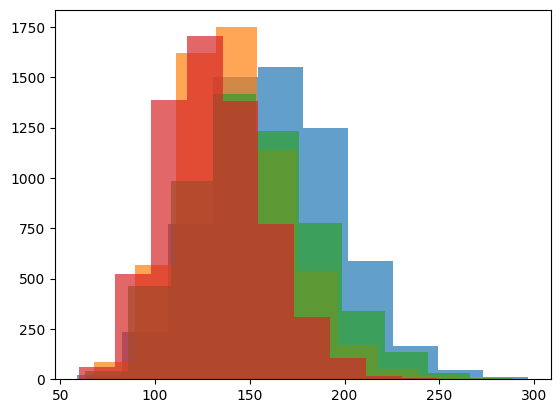

In [ ]:
plt.hist(sum1, alpha=0.7);
plt.hist(sum0, alpha=0.7);
plt.hist(sum2, alpha=0.7);
plt.hist(sum3, alpha=0.7);